# extract ngrams

In [13]:
unigs=[1,2,3,4,5,6,7,8,9]
n=3
for i in range(len(unigs)-n+1):
    print unigs[i],unigs[i+1],unigs[i+2]

1 2 3
2 3 4
3 4 5
4 5 6
5 6 7
6 7 8
7 8 9


In [53]:
unigram_file="syl_norm_sil.csv"
sents=open(unigram_file,'r').read().split('\n\nsil\n\nsil\n')
print len(sents)

7836


In [78]:
n=2
ngrams_agg=[]
for s in sents:
    #each time processing one sentence
    #unigs is the list version of s, a string
    unigs=s.split('\n')
    if len(unigs)<n:
            continue
    print len(unigs)
    
    for i in range(len(unigs)-n+1):
        #process one syllable as the starting point, at each time 
        
        data=[]
        labels=[]
        for j in range(n):
            uni_data=unigs[i+j].split(',')[:-1]
            uni_label=unigs[i+j].split(',')[-1]
            data.extend(uni_data)
            labels.extend(uni_label)
        ngram_label="_".join(labels)
        ngram_data=",".join(data)
        ngram_line=ngram_data+","+ngram_label
        ngrams_agg.append(ngram_line)
        print "=====",i,len(ngrams_agg)
            
print "|total",len(ngrams_agg)            


14
===== 0 1
===== 1 2
===== 2 3
===== 3 4
===== 4 5
===== 5 6
===== 6 7
===== 7 8
===== 8 9
===== 9 10
===== 10 11
===== 11 12
===== 12 13
11
===== 0 14
===== 1 15
===== 2 16
===== 3 17
===== 4 18
===== 5 19
===== 6 20
===== 7 21
===== 8 22
===== 9 23
6
===== 0 24
===== 1 25
===== 2 26
===== 3 27
===== 4 28
9
===== 0 29
===== 1 30
===== 2 31
===== 3 32
===== 4 33
===== 5 34
===== 6 35
===== 7 36
9
===== 0 37
===== 1 38
===== 2 39
===== 3 40
===== 4 41
===== 5 42
===== 6 43
===== 7 44
6
===== 0 45
===== 1 46
===== 2 47
===== 3 48
===== 4 49
14
===== 0 50
===== 1 51
===== 2 52
===== 3 53
===== 4 54
===== 5 55
===== 6 56
===== 7 57
===== 8 58
===== 9 59
===== 10 60
===== 11 61
===== 12 62
9
===== 0 63
===== 1 64
===== 2 65
===== 3 66
===== 4 67
===== 5 68
===== 6 69
===== 7 70
7
===== 0 71
===== 1 72
===== 2 73
===== 3 74
===== 4 75
===== 5 76
9
===== 0 77
===== 1 78
===== 2 79
===== 3 80
===== 4 81
===== 5 82
===== 6 83
===== 7 84
7
===== 0 85
===== 1 86
===== 2 87
===== 3 88
===== 4 89

In [58]:
for i in ngrams_agg[:10]:
    print i

0.55,0.549,0.548,0.547,0.546,0.545,0.544,0.542,0.541,0.54,0.538,0.536,0.534,0.532,0.529,0.525,0.521,0.517,0.512,0.506,0.5,0.494,0.489,0.485,0.481,0.478,0.475,0.473,0.471,0.469,0.467,0.465,0.464,0.462,0.461,0.46,0.459,0.458,0.457,0.456,0.455,0.455,0.454,0.453,0.453,0.452,0.452,0.452,0.452,0.452,0.452,0.452,0.452,0.452,0.453,0.454,0.454,0.455,0.456,0.458,0.459,0.46,0.462,0.463,0.465,0.466,0.468,0.47,0.471,0.472,0.474,0.475,0.476,0.477,0.478,0.478,0.479,0.48,0.48,0.48,0.481,0.481,0.481,0.481,0.481,0.481,0.481,0.48,0.48,0.48,0.479,0.479,0.479,0.478,0.478,0.478,0.477,0.477,0.477,0.477,0.476,0.476,0.476,0.476,0.476,0.476,0.476,0.475,0.475,0.475,0.475,0.475,0.475,0.475,0.476,0.476,0.476,0.476,0.476,0.476,0.476,0.476,0.476,0.476,0.475,0.475,0.475,0.475,0.475,0.474,0.474,0.474,0.473,0.473,0.472,0.472,0.471,0.471,0.47,0.47,0.469,0.469,0.468,0.468,0.467,0.467,0.466,0.466,0.466,0.465,0.465,0.465,0.464,0.464,0.464,0.464,0.463,0.463,0.463,0.463,0.463,0.463,0.462,0.462,0.462,0.461,0.461,0.461,0.46,0.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

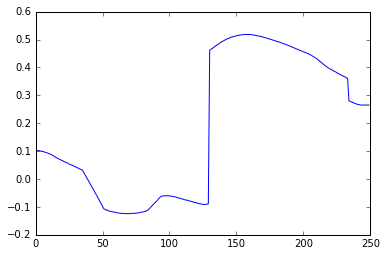

In [75]:
i=5
pdata=[float(j) for j in ngrams_agg[i].split(',')[:-1]]
plt.plot(pdata)

The curves are not very smooth when you do n-grams. this maybe an artifact of normalization, we'll have to go back and check. But for the QBC this is fine, for motif discovery it can be tricky how to interpret. Actually, we don't know if it is fine - if two ngrams have different length for each unigram, then the different location of the jump could be a factor. 

Next: downsampling

## why is n-grams discontinuous? is it because syllable extraction didn't include the unvoiced segments (interpolated in previous pitch files)

plot some pitch files in norm_pitch/

In [32]:
def read_pitch(procd_tab):
    #procd_tab='procd_pitch/CHJ000014_proc.tab'
    f=open(procd_tab,'r').read().split('\n')
    time=[]
    pitch=[]
    for line in f[1:]:
        if line!='':
            time.append(line.split('\t')[0])
            pitch.append(line.split('\t')[1])
            
            #the pitch vector contains pitch values (track) of one contour of the sentence
    return time,pitch

In [181]:
def extract_syl(timestamps,time,pitch):
    """input is timestamps and pitch contour of a sentence;output is a list of syl-length pitch vectors extracted from this sentence. later we write these vectors into a file, each row is one syl-length vector of pitch"""
    pitch_vec=[]
    k=0
    while k<len(timestamps):
        #print k
        this_syl_values,label = get_syl_vec(timestamps[k],pitch,time)
        
        #print "this:",this_syl_values
        
        if label=='sil':
            k+=1
            continue
        
        m = re.search(r'\d$', label)
        if m is not None:
            #print 'vowel case'
            next_label = timestamps[k+1][2]
            if next_label=="sil":
                position='end'
            else:
                position='mid'
            this_syl_values.append(position)
            pitch_vec.append(this_syl_values)
            k+=1
        else:
            next_label = timestamps[k+2][2]
            if next_label=="sil":
                position='end'
            else:
                position='mid'
            
            
            next_syl_values,label_next = get_syl_vec(timestamps[k+1],pitch,time)
            #print 'NEXT:',next_syl_values
            combined_label=label+label_next
            print combined_label
            combined_syl = this_syl_values[:-1]
            combined_syl.extend(next_syl_values)
            combined_syl.append(position)
            pitch_vec.append(combined_syl)
            k+=2
            
    return pitch_vec

def get_syl_vec(tsp,pitch,time):
    start, end, label = tsp[0], tsp[1], tsp[2] 
    syl_values=[str(round(float(pitch[i]),3)) for i in range(len(pitch)) \
                if float(time[i])>=float(start) and float(time[i]) <=float(end) and float(pitch[i])!=1000]
    syl_values.append(label[-1])
    return syl_values,label

498


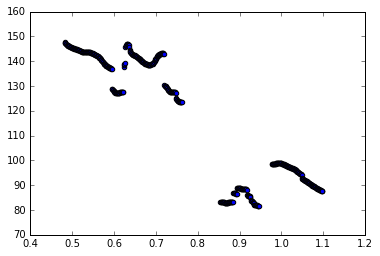

In [139]:
norm_pitch_file='pitch/pitcCHJ000014.tab'
#norm_pitch_file='procd_pitch/CHJ000014_proc.tab'

f=open(norm_pitch_file,'r').read().split('\n')
print len(f)
time=[]
pitch=[]
for l in f[1:]:
    if l!='':
        line=l.split('\t')
        time.append(line[0])
        pitch.append(line[1])
ftime=[float(i) for i in time]
fpitch=[float(i) for i in pitch]
plt.scatter(ftime,fpitch)


1279


(0, 200)

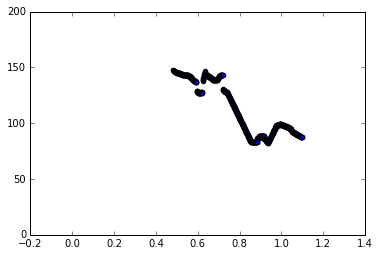

In [142]:
#norm_pitch_file='pitch/pitcCHJ000014.tab'
norm_pitch_file='procd_pitch/CHJ000014_proc.tab'

f=open(norm_pitch_file,'r').read().split('\n')
print len(f)
time=[]
pitch=[]
for l in f[1:]:
    if l!='':
        line=l.split('\t')
        time.append(line[0])
        pitch.append(line[1])
ftime=[float(i) for i in time]
fpitch=[float(i) for i in pitch]
plt.scatter(ftime,fpitch)
plt.ylim(0,200)

after investigating the praat pitch object, it doesn't seem like the dip was a unreliable outlier. (in praat though this would look much more continuous due to the large ylim). 

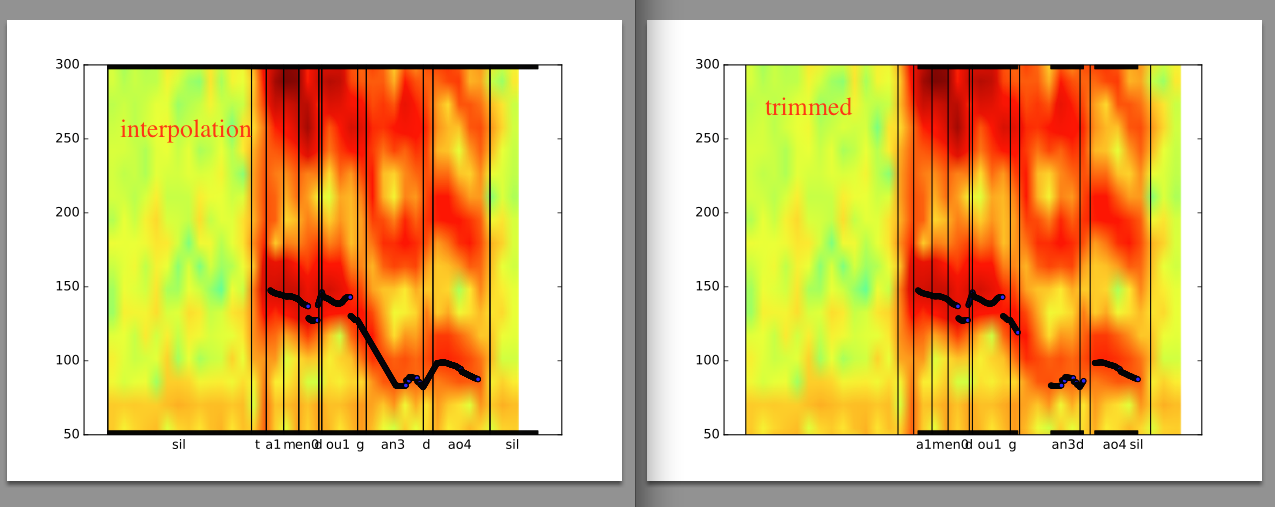

In [143]:
from IPython.display import Image
Image(filename='doubleCHJ14.png') 

From this comparison, we can see that on the right there is no pitch got trimmed. Then on the left, I think the real question here is that the discontinuous pitch points like those in 'men0' is not really interpolated, as they would be in praat. But whether that will make a difference in the ngrams, that is another question. 

The reason this isn't interpolated is clear: if two consecutive points are at least 0.001 apart, they will be interpolated. Otherwise it will not. sample transition:

0.579	138.537675252
0.58	138.391921804
0.581	138.258572206
0.582	138.136152743
0.583	138.023015766
0.584	137.917287228
0.585	137.81747042
0.586	137.72170807
0.587	137.628225967
0.588	137.535133922
0.589	137.440223939
0.59	137.340774753
0.591	137.233205719
0.592	137.112702705
0.593	136.972729941
0.594	136.803238269


0.595	128.825841397
0.596	128.618755378
0.597	128.415759655
0.598	128.215677265
0.599	128.019109109
0.6	127.827942444
0.601	127.646855027


My current conclusion is that this is not a big deal.

## use this pipeline to test if the extract_syl_whole works: in the end, if the plots are identical, it's a success.

In [178]:
#loading timestamps
phons='all_data/CHJ000038.phons'
timestamps,xt,labels=get_annos(phons)
timestamps

[['0', '0.2725', 'sil'],
 ['0.2725', '0.3925', 'v2'],
 ['0.3925', '0.4625', 'c'],
 ['0.4625', '0.5225', 'ii3'],
 ['0.5225', '0.5725', 't'],
 ['0.5725', '0.7125', 'ong2'],
 ['0.7125', '0.8125', 'sh'],
 ['0.8125', '0.9725', 'iii2'],
 ['0.9725', '1.1825', 'sil'],
 ['1.1825', '1.2525', 't'],
 ['1.2525', '1.3225', 'a1'],
 ['1.3225', '1.3725', 'm'],
 ['1.3725', '1.4325', 'en0'],
 ['1.4325', '1.5025', 'q'],
 ['1.5025', '1.6725', 've4'],
 ['1.6725', '1.8125', 'j'],
 ['1.8125', '1.9925', 'i4'],
 ['1.9925', '2.0725', 'x'],
 ['2.0725', '2.2025', 'v4'],
 ['2.2025', '2.2625', 'd'],
 ['2.2625', '2.4525', 'ao4'],
 ['2.4525', '2.5525', 'q'],
 ['2.5525', '2.6625', 'ie4'],
 ['2.6625', '2.7325', 'm'],
 ['2.7325', '2.8825', 'ei3'],
 ['2.8825', '2.9525', 'g'],
 ['2.9525', '3.0525', 'uo2'],
 ['3.0525', '3.0925', 'd'],
 ['3.0925', '3.2825', 'e0'],
 ['3.2825', '3.392', 'sil']]

In [182]:
#extracting syllables
inputfile="norm_pitch/CHJ000038_norm.tab"
times,pitch=read_pitch(inputfile)
pv=extract_syl(timestamps,times,pitch)
print len(pv)

cii3
tong2
shiii2
ta1
men0
qve4
ji4
xv4
dao4
qie4
mei3
guo2
de0
14


In [183]:
#sanity check of extracted syllables
for i in pv:print i[-5:]

['0.543', '0.541', '0.539', '2', 'mid']
['0.063', '0.062', '0.06', '3', 'mid']
['0.279', '0.274', '0.271', '2', 'mid']
['0.004', '0.007', '0.01', '2', 'end']
['0.735', '0.735', '0.734', '1', 'mid']
['0.52', '0.517', '0.514', '0', 'mid']
['0.385', '0.385', '0.385', '4', 'mid']
['-0.079', '-0.079', '-0.079', '4', 'mid']
['-0.157', '-0.145', '-0.133', '4', 'mid']
['-0.484', '-0.482', '-0.481', '4', 'mid']
['-0.468', '-0.466', '-0.463', '4', 'mid']
['-0.556', '-0.55', '-0.544', '3', 'mid']
['-0.175', '-0.175', '-0.174', '2', 'mid']
['-0.404', '-0.405', '-0.405', '0', 'end']


In [137]:
len(pitch)

2527

2454


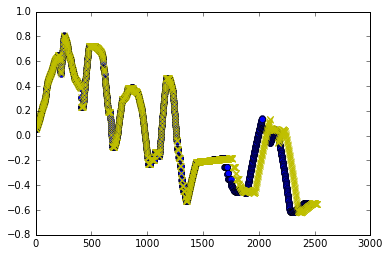

In [136]:
#plot overlap of extracted vs. original pitch
sent=[]
for i in pv:
    sent.extend(i[:-1])
print len(sent)
plt.plot(sent,'o')
plt.plot(pitch,'yx')

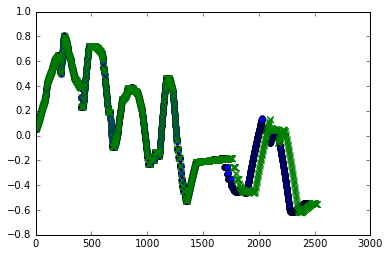

conclusion: at this point, the extract_syl_whole is doing a good job extracting the entire sentence, without leaving gaps of unvoiced seg.But at this point, the problem is deeper as in why the curves is not more continuous.we'll have to go back and see interpolation. but as far as extract syllable goes, we can use this to extract syllable pitch contours for n-grams.

### extracted syl_norm_whole

check to plot.

In [153]:
pv=open('syl_csv_norm_whole/CHJ000005_whole.csv','r').read().split('\n')
print pv[:2]

['0.495,0.495,0.494,0.493,0.492,0.491,0.49,0.49,0.489,0.488,0.487,0.486,0.485,0.485,0.484,0.483,0.482,0.482,0.481,0.48,0.48,0.479,0.478,0.478,0.477,0.476,0.475,0.474,0.474,0.473,0.472,0.471,0.469,0.468,0.467,0.466,0.464,0.463,0.462,0.46,0.459,0.457,0.456,0.455,0.454,0.453,0.452,0.451,0.45,0.449,0.449,0.448,0.447,0.447,0.446,0.446,0.445,0.445,0.444,0.443,0.443,0.442,0.441,0.44,0.439,0.438,0.437,0.436,0.435,0.434,0.433,0.432,0.431,0.429,0.428,0.427,0.426,0.426,0.425,0.424,0.423,0.422,0.421,0.42,0.42,0.419,0.418,0.417,0.416,0.415,0.415,0.414,0.413,0.412,0.411,0.411,0.41,0.409,0.409,0.408,0.408,0.407,0.407,0.406,0.406,0.406,0.406,0.405,0.405,0.405,0.405,0.405,0.405,0.405,0.405,0.405,0.405,0.406,0.406,0.407,0.407,0.408,0.408,0.409,0.41,0.411,0.412,0.414,0.415,0.417,0.418,0.42,0.422,0.424,0.426,0.428,0.43,0.432,0.434,0.436,0.439,0.442,0.444,0.447,0.451,0.454,0.458,0.461,0.463,0.465,0.467,0.468,0.469,0.469,0.47,0.469,0.469,0.467,0.466,0.464,0.462,0.459,0.455,0.451,0.447,0.442,0.438,0.433,0.42

2756


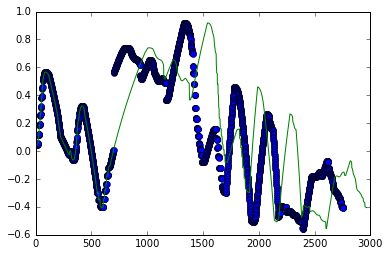

In [166]:
inputfile='syl_csv_norm_whole/CHJ000038_whole.csv'
pitchfile='norm_pitch/CHJ000038_norm.tab'
pv=open(inputfile,'r').read().split('\n')
times,pitch=read_pitch(pitchfile)
sent=[]
for i in pv:
    fi=i.split(',')
    sent.extend(fi[:-1])
sent
print len(sent)
plt.plot(sent,'o')
plt.plot(pitch,'g-')
plt.savefig('timeshift.pdf')

This is looking into why sometimes there is time shift between extracted ngrams and the original pitch (procd) track: in the above, green is original pitch. After plotting with segmental information from .phons file, we discovered that the reason is that there is a 'sil' in the middle of the utterances. take a look:

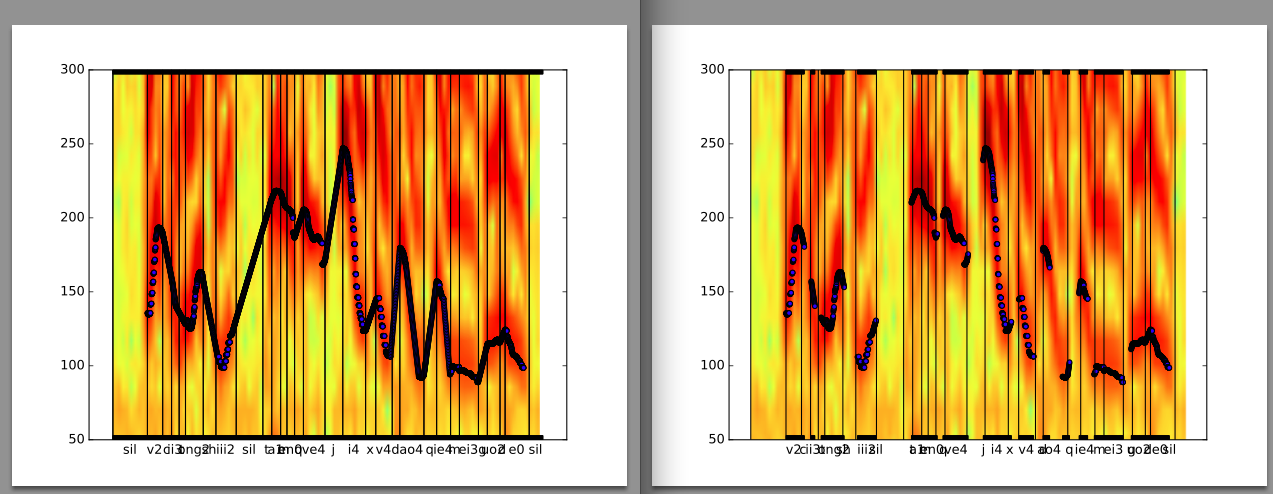

In [167]:
Image(filename='sil-mid.png') 

The interpolation (left) of 'sil' in the middle looked so dense because it was interpolated back later along with all unvoiced segments at 0.001 interval. 

In this case, if we deal with unigram, we need to make sure the 'sil' segment in the middle is not extracted (which it should work that way since sil doesn't need in \d). If ngrams, then we just plainly need to skip 'sil', which is currently the case, resulting in the difference in plot above between green line and blue dots.

### considering this kind if effect of sil in the middle, it requires extra processing in the ngrams extraction. We don't want to extract bigrams that are separated by 'sil' in the middle of an utterance file.

# extract ngrams

In [192]:
unigram_file="syl_norm_split.csv"
#unigram_file="snapshot-uni.csv"
sents=open(unigram_file,'r').read().split(',end\n')


In [205]:
s=sents[0]
unigs=s.split('\n')
unigs[-1]+=',end'
print(unigs[-1])



-0.651,-0.648,-0.646,-0.643,-0.64,-0.638,-0.635,-0.633,-0.63,-0.627,-0.625,-0.622,-0.62,-0.617,-0.614,-0.612,-0.609,-0.607,-0.604,-0.602,-0.599,-0.597,-0.594,-0.592,-0.589,-0.586,-0.584,-0.581,-0.579,-0.576,-0.574,-0.571,-0.569,-0.566,-0.564,-0.561,-0.559,-0.557,-0.554,-0.552,-0.549,-0.547,-0.544,-0.542,-0.539,-0.537,-0.535,-0.532,-0.53,-0.527,-0.525,-0.522,-0.52,-0.518,-0.515,-0.513,-0.51,-0.508,-0.506,-0.503,-0.501,-0.499,-0.496,-0.494,-0.491,-0.489,-0.487,-0.484,-0.482,-0.48,-0.477,-0.475,-0.473,-0.47,-0.468,-0.466,-0.463,-0.461,-0.459,-0.456,-0.454,-0.452,-0.45,-0.447,-0.445,-0.443,-0.444,-0.446,-0.447,-0.448,-0.449,-0.449,-0.45,-0.451,-0.451,-0.451,-0.451,-0.451,-0.451,-0.451,-0.451,-0.451,-0.451,-0.451,-0.45,-0.45,-0.45,-0.449,-0.449,-0.449,-0.448,-0.448,-0.448,-0.448,-0.448,-0.448,-0.448,-0.448,-0.448,-0.448,-0.448,-0.448,-0.449,-0.449,-0.45,-0.45,-0.451,-0.452,-0.452,-0.453,-0.454,-0.455,-0.456,-0.458,-0.459,-0.461,-0.463,-0.465,-0.468,-0.47,-0.472,-0.474,-0.475,-0.475,-0.476,-

In [210]:
for i in unigs:
    label=i.split(',')[-2]
    print label

4
3
1
1
2
0
4
4
4
4
2
4
4
0
4
4
4


In [207]:
n=2
ngrams_agg=[]
for i in range(len(unigs)-n+1):
    #process one syllable as the starting point, at each time 

    data=[]
    labels=[]
    for j in range(n):
        uni_data=unigs[i+j].split(',')[:-2]
        uni_label=unigs[i+j].split(',')[-2]
        data.extend(uni_data)
        labels.extend(uni_label)
    ngram_label="_".join(labels)
    ngram_data=",".join(data)
    ngram_line=ngram_data+","+ngram_label
    ngrams_agg.append(ngram_line)
    #print "=====",i,len(ngrams_agg)

In [212]:
for i in ngrams_agg:
    label=i.split(',')[-1]
    print label

4_3
3_1
1_1
1_2
2_0
0_4
4_4
4_4
4_4
4_2
2_4
4_4
4_0
0_4
4_4
4_4


In [267]:
#after we're done extracting bi and tri grams, see how smooth it is
f=open('trigram_new.csv','r').read().split('\n')
print len(f)

78028


i= 32264


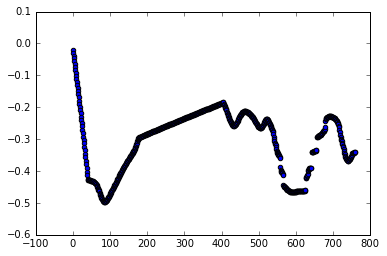

In [279]:
import random

i=random.choice(range(len(f)))
print 'i=',i
test=f[i].split(',')[:-1]
x=range(len(test))
plt.scatter(x,test)

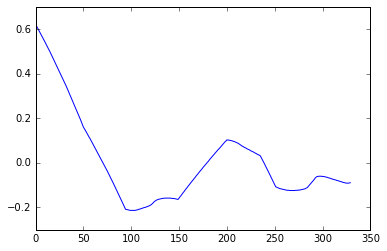